# Problem Statement: Sentiment Analysis Using TF-IDF Vectors
__Objective:__
Design and implement a machine learning model to perform sentiment analysis on a given
dataset containing textual data and corresponding sentiment labels. The analysis should use
TF-IDF (Term Frequency-Inverse Document Frequency) vectors to transform the text into
numerical features and classify the sentiments effectively.
Dataset Description for Sentiment Analysis Project

__Content:__
The dataset is stored in a CSV file and includes six fields:

__1. Polarity (Column 0):__
○ Sentiment label for the tweet:
■ 0: Negative sentiment
■ 2: Neutral sentiment
■ 4: Positive sentiment

__2. Tweet ID (Column 1):__
○ A unique identifier for each tweet.

__3. Date (Column 2):__
○ The timestamp of when the tweet was posted, in the format Day Month Date
HH:MM:SS UTC Year (e.g., Sat May 16 23:58:44 UTC 2009).

__4. Query (Column 3):__
○ The search query used to retrieve the tweet. If no query was used, the value is
NO_QUERY.

__5. User (Column 4):__
○ The username of the account that posted the tweet (e.g., robotickilldozr).

__6. Text (Column 5):__
○ The content of the tweet, consisting of raw text after emoticons have been removed
(e.g., Lyx is cool).

# Step 1 :- import useful libraries and data set

In [1]:
import numpy as np #basic
import pandas as pd #to store and manipulate dataset
import seaborn as sns  # to visulaize dataset
import matplotlib.pyplot as plt #same
import nltk                     # for preprocessing text
import spacy                    # for preprocessing text , advanced library
from sklearn.feature_extraction.text import TfidfVectorizer  #for vectorization
from sklearn.metrics import accuracy_score,classification_report  # for analyzing our model
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/NLP_Assignement_1/training.1600000.processed.noemoticon.csv',index_col='id of the tweet',encoding='ISO-8859-1')


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048572 entries, 1467810672 to 1960186607
Data columns (total 5 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   polarity of tweet   1048572 non-null  int64 
 1   date of the tweet   1048572 non-null  object
 2   query               1048572 non-null  object
 3   user                1048572 non-null  object
 4   text of the tweet   1048572 non-null  object
dtypes: int64(1), object(4)
memory usage: 48.0+ MB


__Label__ :- 'polarity of tweet'
__feature__:- 'text of the tweet'

In [10]:
data.head()

,polarity of tweet,date of the tweet,query,user,text of the tweet
id of the tweet,,,,,
1467810672,0,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1467810917,0,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
1467811184,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
1467811193,0,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
1467811372,0,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [11]:
data.columns

Index(['polarity of tweet ', 'date of the tweet', 'query', 'user',
       'text of the tweet '],
      dtype='object')

In [4]:
# we can see extra space in column name so we need to remove it
data=data.rename(columns=lambda x:x.strip())

In [13]:
data.columns

Index(['polarity of tweet', 'date of the tweet', 'query', 'user',
       'text of the tweet'],
      dtype='object')

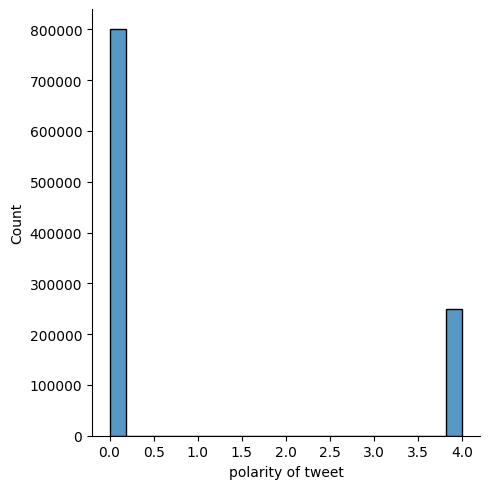

In [14]:
sns.displot(data,x='polarity of tweet')

In [15]:
data[data['polarity of tweet']==2]

,polarity of tweet,date of the tweet,query,user,text of the tweet
id of the tweet,,,,,


__IT means no neutral sentiment here__

# Step 2 :- Text Preprocessing

__Lower casing , tokenization , removal of special char. and puntuation , removal of stopwords and lemmatization.__
by using Spacy.

In [5]:
nlp=spacy.load('en_core_web_sm')

In [6]:
def text_preprocessing(texts):
    processed_texts=[]
    for doc in nlp.pipe(texts,n_process=-1):
        tokenzied=[token.lemma_.lower() for token in doc if token.is_alpha and token.lemma_ not in nlp.Defaults.stop_words]
        processed_text=" ".join(tokenzied)
        processed_texts.append(processed_text)
    return processed_texts

In [7]:
data['text of the tweet']=text_preprocessing(data['text of the tweet'])

In [8]:
data['text of the tweet']

,text of the tweet
id of the tweet,
1467810672,upset update facebook texte cry result school ...
1467810917,i dive time ball manage save rest bound
1467811184,body feel itchy like fire
1467811193,behave i mad i i
1467811372,crew
...,...
1960186342,grandma dinenr mum
1960186409,mid morning snack time bowl cheese noodle yum
1960186429,like terminiator movie come like word


#  Step 3: Convert Text to TF-IDF Vectors

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 most important words

X = tfidf_vectorizer.fit_transform(data['text of the tweet'])  # Transform text into vectors
y = data['polarity of tweet']  # Labels (sentiments)

print("Shape of TF-IDF Matrix:", X.shape)


Shape of TF-IDF Matrix: (1048572, 5000)


# Step 4: Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set:", X_train.shape, "Testing Set:", X_test.shape)


Training Set: (838857, 5000) Testing Set: (209715, 5000)


# Step 5: Train a Machine Learning Model

In [12]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()  # Naïve Bayes Model
model.fit(X_train, y_train)

print("✅ Model Training Complete!")


✅ Model Training Complete!


# Step 6: Evaluate the Model

In [14]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("📊 Model Accuracy:", accuracy)
print("\n📑 Classification Report:\n", classification_report(y_test, y_pred))


📊 Model Accuracy: 0.8012254726652839

📑 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88    160000
           4       0.82      0.21      0.33     49715

    accuracy                           0.80    209715
   macro avg       0.81      0.60      0.61    209715
weighted avg       0.80      0.80      0.75    209715



# Step 7: Visualize Results

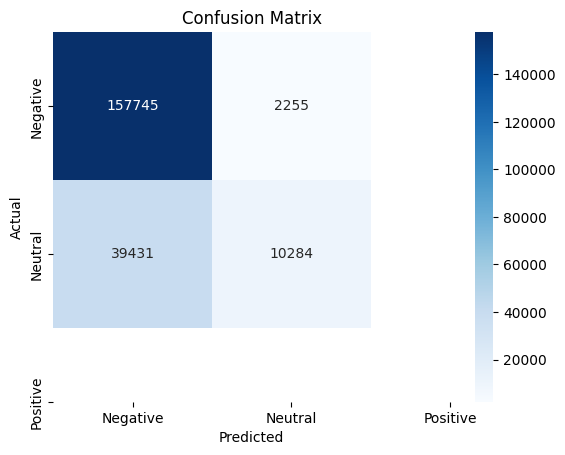

In [15]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
